## Problem Statement
In a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship between user engagement (reviews, tips, and check-ins) and business success metrics (review count, ratings) for restaurants.

## Research Objectives
1. **Quantify the correlation between user engagemlent (reviews, tips, check-ins) and review count/average star rating:** This will help us determine if
   restaurants with higher user engagement experience a corresponding increase in reviews and ratings.
2. **Analyze the impact of sentiment on review count and average star rating:** We will investigate if positive sentiment in reviews and tips translates to
   higher starratings and potentially influences the total number of reviews left.
3. **Time trends in User Engagement:** We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to
 sporadic bursts of activity.

## Hypothesis Testing
- Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.
- Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.
- Consistent engagement over time is positively associated with sustained business success for restaurants.

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium # for Design interactive maps
from geopy.geocoders import Nominatim #  for convert address to latitude and longitude.
from matplotlib.colors import LinearSegmentedColormap # for Create custom color maps for better data representation.
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [3]:
# creating database connection
db = sqlite3.connect('yelp.db')

# check tables in yelp.db
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'", db)
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [4]:
# Explore what type of data available in the tables
for table in tables['name']:
    display(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5", db))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


# Data Analysis

In [5]:
pd.read_sql_query("select count(*) from business", db)

,count(*)
0,150346


In [6]:
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open = 1""", db)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [12]:
# what is the descriptive states for review count and star rating for businesses?
# avg, min, max, median
pd.read_sql_query(f"""
    SELECT 
        AVG(review_count) AS avg_review_count, 
        MIN(review_count) AS min_review_count, 
        MAX(review_count) AS max_review_count,
        (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,

        AVG(stars) AS avg_star_count, 
        MIN(stars) AS min_star_count, 
        MAX(stars) AS max_star_count,
        (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_count  
    FROM business 
    WHERE business_id IN {tuple(business_id['business_id'])}
""", db).transpose() #transpose is used to convert row form data into index form 


,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_star_count,3.477281
min_star_count,1.000000
max_star_count,5.000000
median_star_count,3.500000


In [10]:
# for remove outlier we use IQR (Inter Quartile range) function
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
business_id = remove_outliers(business_id, 'review_count')

In [13]:
# which resturants have higest number of reviews
pd.read_sql_query(f"""
    SELECT name, 
           SUM(review_count) AS review_count, 
           AVG(stars) AS avg_rating
    FROM business 
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY name
    ORDER BY review_count DESC
    LIMIT 10
""", db)


,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [14]:
# which resturants have higest number of rating
pd.read_sql_query(f"""
    SELECT name, 
           SUM(review_count) AS review_count, 
           AVG(stars) AS avg_rating
    FROM business 
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY name
    ORDER BY avg_rating DESC
    LIMIT 10
""", db)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [15]:
# Do restaurants with higher engagement tend to have higer rating?
pd.read_sql_query("""select business_id,
sum(length(date) - length(replace(date, ',',''))) as checkin_count
from checkin
group by business_id""",db)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,10
1,--0iUa4sNDFiZFrAdIWhZQ,9
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,9
4,--7jw19RH9JKXgFohspgQw,25
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,66
131926,zznZqH9CiAznbkV6fXyHWA,0
131927,zzu6_r3DxBJuXcjnOYVdTw,22
131928,zzw66H6hVjXQEt0Js3Mo4A,1


In [16]:
pd.read_sql_query("""select business_id, count(*) as tip_count
from tip
group by business_id""",db)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [17]:
query = f"""
SELECT 
    total.avg_rating AS rating,
    AVG(total.review_count) AS avg_review_count,
    AVG(total.checkin_count) AS avg_checkin_count,
    AVG(total.tip_count) AS avg_tip_count
FROM (
    SELECT 
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', ''))) AS checkin_count,
        COALESCE(tip.tip_count, 0) AS tip_count
    FROM business b
    LEFT JOIN checkin cc ON b.business_id = cc.business_id
    LEFT JOIN (
        SELECT business_id, COUNT(business_id) AS tip_count 
        FROM tip 
        GROUP BY business_id
    ) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id
) AS total
GROUP BY total.avg_rating;
"""

# Execute the query using pd.read_sql_query
review_count_df = pd.read_sql_query(query, db)
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,16.518072,1.751323
1,1.5,24.358459,33.480969,3.243719
2,2.0,27.759629,51.386515,3.815777
3,2.5,36.631037,78.349429,5.441404
4,3.0,48.054998,104.970405,7.384984
5,3.5,63.730125,124.781702,9.512747
6,4.0,73.136954,126.139075,10.328477
7,4.5,65.282554,85.177605,7.931141
8,5.0,31.127979,26.545113,2.912621


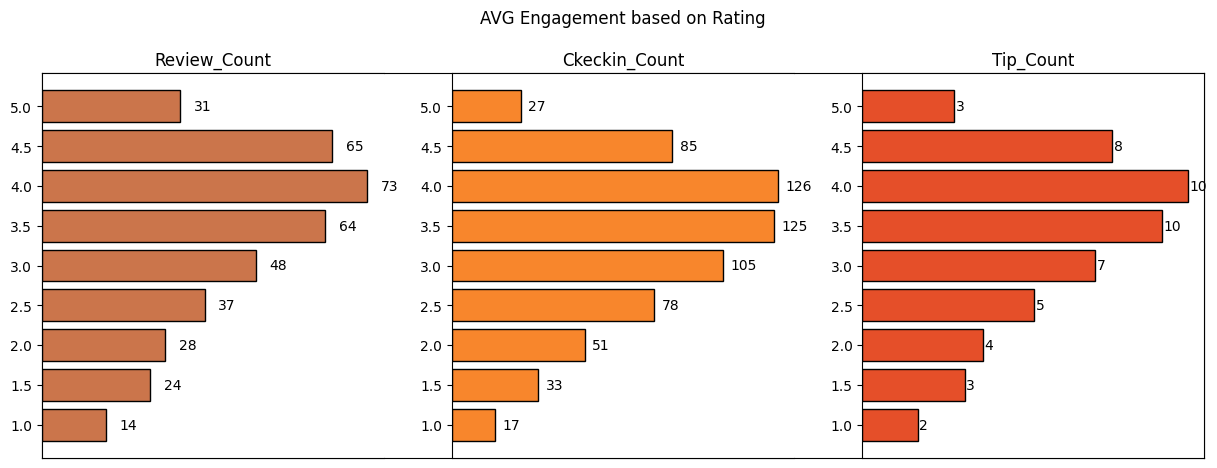

In [18]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review_Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor='k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color = 'black', va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.title('Ckeckin_Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor='k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color = 'black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip_Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor='k', color = '#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color = 'black', va='center')
plt.xticks([])
plt.savefig('Avg_engagement.png', transparent=True)
plt.show()


In [19]:
# Is there a corelation between the number of reviews, tips, and check_ins for a business?
query = f"""
    SELECT 
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', ''))) AS checkin_count,
        COALESCE(tip.tip_count, 0) AS tip_count,
        (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) As category
    FROM business b
    LEFT JOIN checkin cc ON b.business_id = cc.business_id
    LEFT JOIN (
        SELECT business_id, COUNT(business_id) AS tip_count 
        FROM tip 
        GROUP BY business_id
    ) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id
"""

# Execute the query using pd.read_sql_query
engagement_df = pd.read_sql_query(query, db).dropna()
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,10.0,4,High-Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,9.0,6,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,117.0,6,Low-Rated
3,--hF_3v1JmU9nlu4zfXJ8Q,15,4.5,6.0,0,High-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,20.0,2,Low-Rated
...,...,...,...,...,...,...
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,291.0,17,Low-Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,19.0,2,High-Rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,26.0,2,High-Rated
31535,zznJox6-nmXlGYNWgTDwQQ,30,1.5,66.0,6,Low-Rated


In [20]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.644334,0.782699
checkin_count,0.644334,1.000000,0.781412
tip_count,0.782699,0.781412,1.000000


<Axes: >

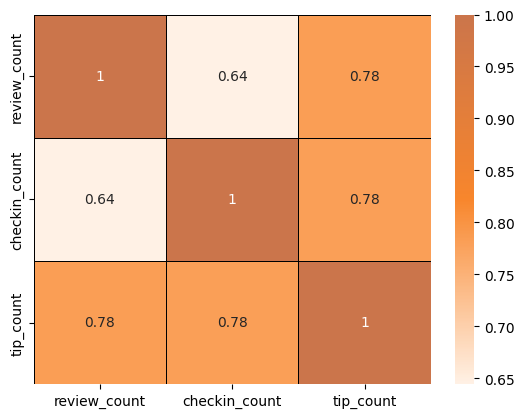

In [21]:
colors = ['#FFF1E5', '#F8862C', '#CB754B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap', colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths = 0.5, linecolor = 'black')

In [22]:
# Is there a difference in the user engagement (review , check-in  and tips) between haigh_rated and low_rated businesses?
engagement_df.groupby('category')[['review_count', 'checkin_count', 'tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,66.532056,110.07557,9.159340
Low-Rated,38.270290,78.00000,5.693289


In [23]:
# function to calculate the success score based on the avg rating and total review count 
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [24]:
# How do the success metrics (review_count or avg_rating) of resturants very across different states and cities ?
city_df = pd.read_sql_query(f"""
    SELECT 
        city, state,  latitude, longitude, 
        AVG(stars) AS avg_rating, 
        SUM(review_count) AS review_count,
        COUNT(*) AS restaurant_count
    FROM 
        business
    WHERE 
        business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        state, city
    ORDER BY 
        review_count DESC
    LIMIT 10
""", db)

city_df['success_score'] = calculate_success_metric(city_df)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [25]:
# Create a base map
m =folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start = 4)

# Define a color scale
color_scale = folium.LinearColormap(colors = ['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max()
                                    )

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 5,
        colors = color_scale(row['success_score']),
        fill = True,
        color = color_scale(row['success_score']),
        color_opacity = 0.7,
        popup=f"success score: {row['success_score']} "
    ).add_to(m)

# Add color scale to the map 
m.add_child(color_scale)

In [26]:
# Are there any patteren in user engagement over time successful businesses compared to less sucessful one ?
# Are there any seasonal trends in the user engagement for restaurant ?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count 
FROM
    (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
    FROM review
    WHERE business_id IN {tuple(business_id['business_id'])} 
        AND stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year) AS review
JOIN
    (SELECT strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
    FROM tip
    JOIN business AS b
        ON tip.business_id = b.business_id
    WHERE tip.business_id IN {tuple(business_id['business_id'])} 
        AND b.stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year) AS tip
ON review.month_year = tip.month_year
""", db)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count 
FROM
    (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
    FROM review
    WHERE business_id IN {tuple(business_id['business_id'])} 
        AND stars < 3.5
    GROUP BY month_year
    ORDER BY month_year) AS review
JOIN
    (SELECT strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
    FROM tip
    JOIN business AS b
        ON tip.business_id = b.business_id
    WHERE tip.business_id IN {tuple(business_id['business_id'])} 
        AND b.stars < 3.5
    GROUP BY month_year
    ORDER BY month_year) AS tip
ON review.month_year = tip.month_year
""", db)


In [27]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [28]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [29]:
time_rating = pd.read_sql_query(f"""
SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review 
WHERE business_id In {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
""", db)

In [30]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [31]:
# To change month_year data type string into date
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace= True)
time_rating = time_rating[time_rating['month_year'] > '2017']

high_rated_engagement['month_year']  = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

low_rated_engagement['month_year']  = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']

In [32]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

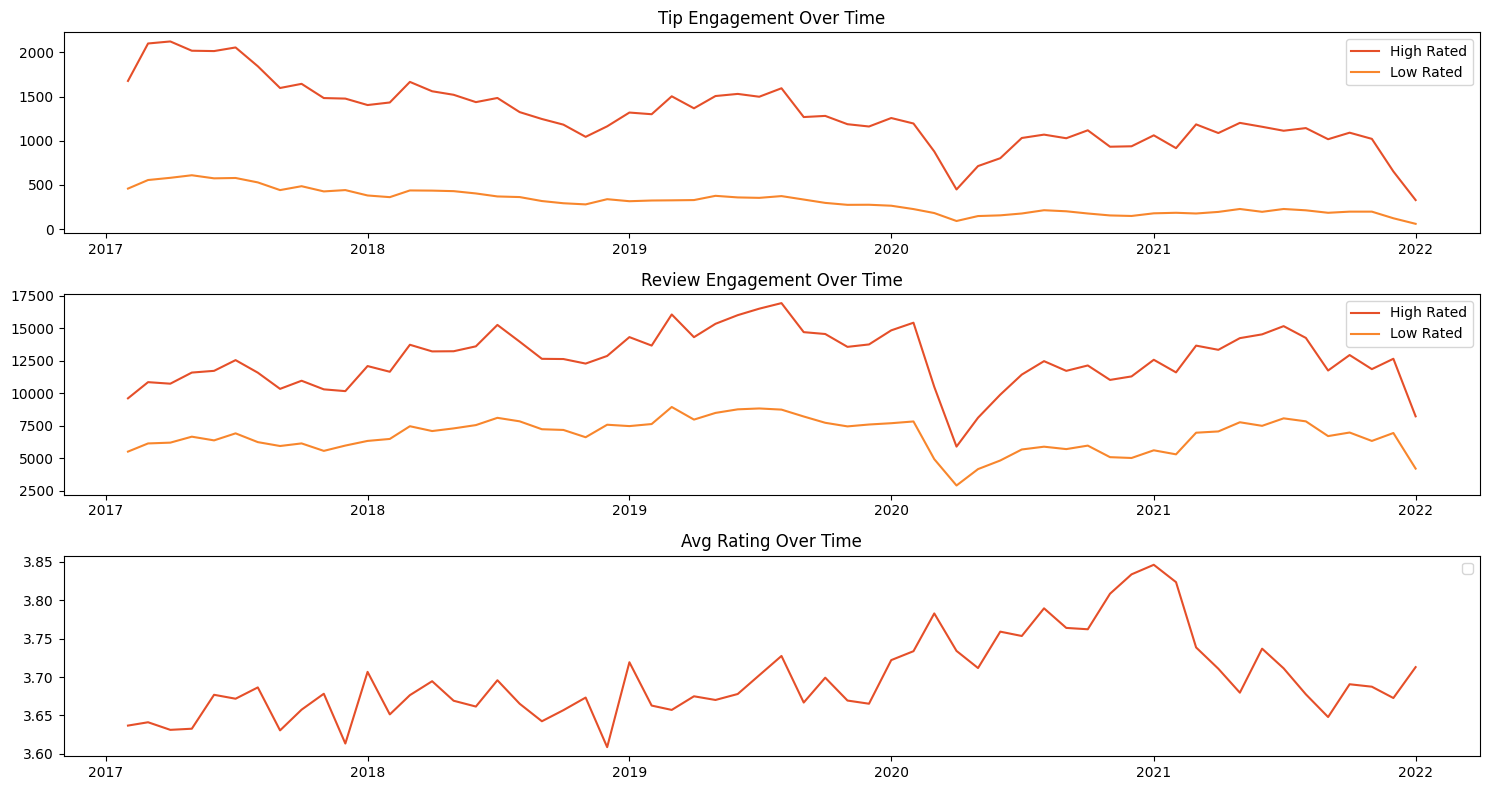

In [33]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29' )
plt.legend()
plt.tight_layout()
plt.savefig('pattern.png', transparent = True)
plt.show()


In [38]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

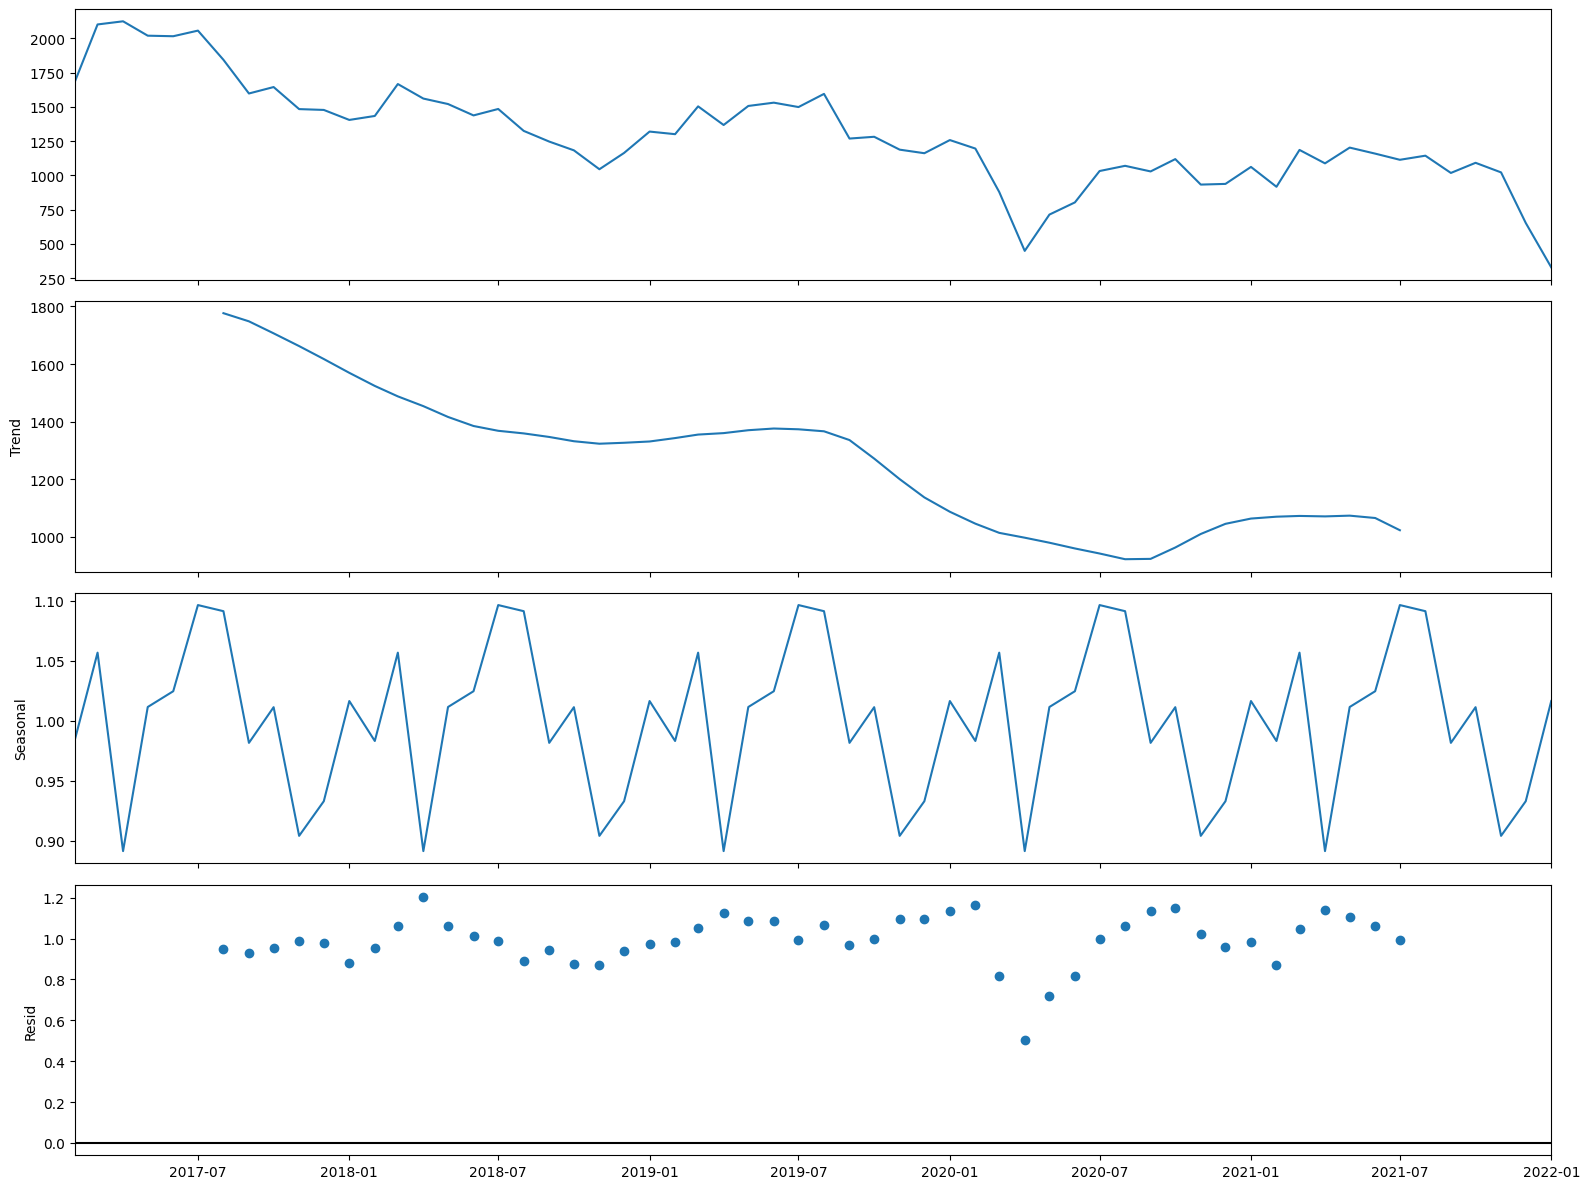

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                 model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.savefig('tip_high_rated.png', transparent = True)
plt.show()

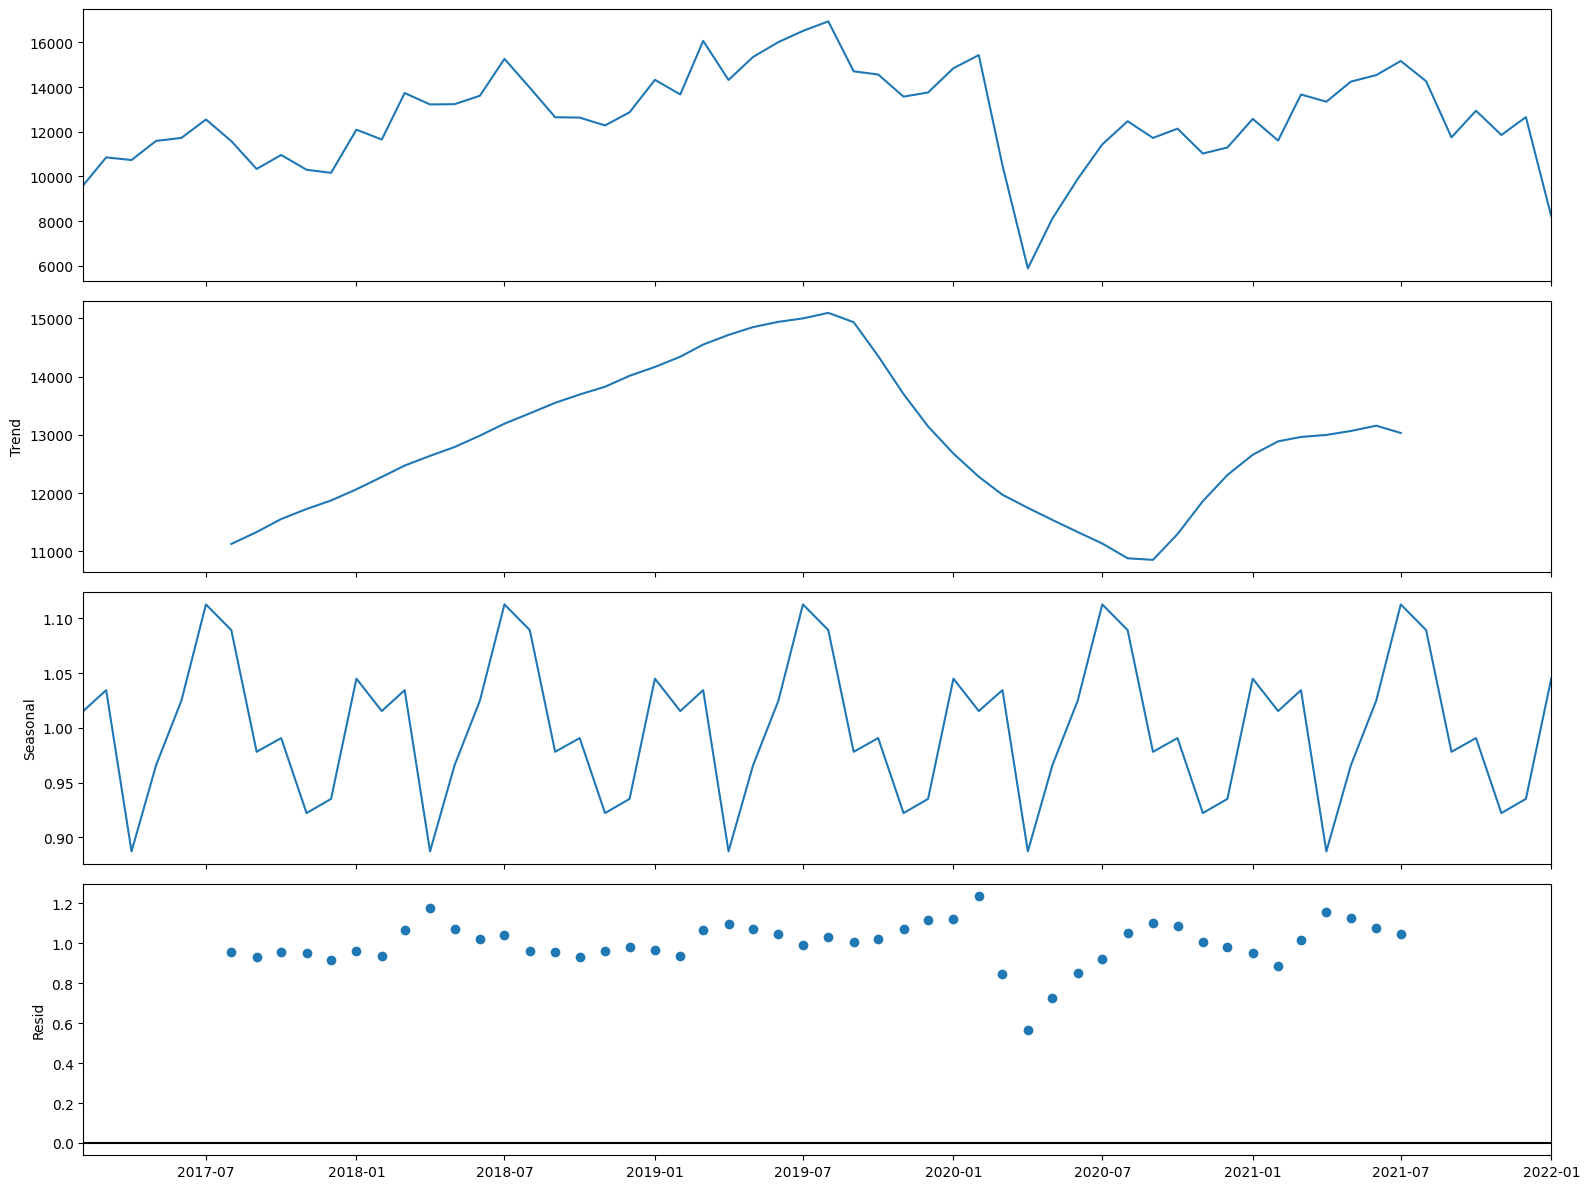

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                 model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.savefig('review_high_rated.png', transparent = True)
plt.show()

In [41]:
# How does the sentiment of review and tips (useful, funny, cool) correlate with the success metrics of restaurant?

In [47]:
sentiment_df = pd.read_sql_query(f"""
SELECT b.business_id, AVG(b.stars) AS avg_rating, SUM(b.review_count) AS review_count,
       SUM(s.useful_count) AS useful_count,
       SUM(s.funny_count) AS funny_count,
       SUM(s.cool_count) AS cool_count
FROM
    (SELECT business_id,
            SUM(useful) AS useful_count,
            SUM(funny) AS funny_count,
            SUM(cool) AS cool_count
     FROM review
     GROUP BY business_id) AS s
JOIN business AS b ON s.business_id = b.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY avg_rating DESC
""", db)

# remove present outlies
sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [48]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

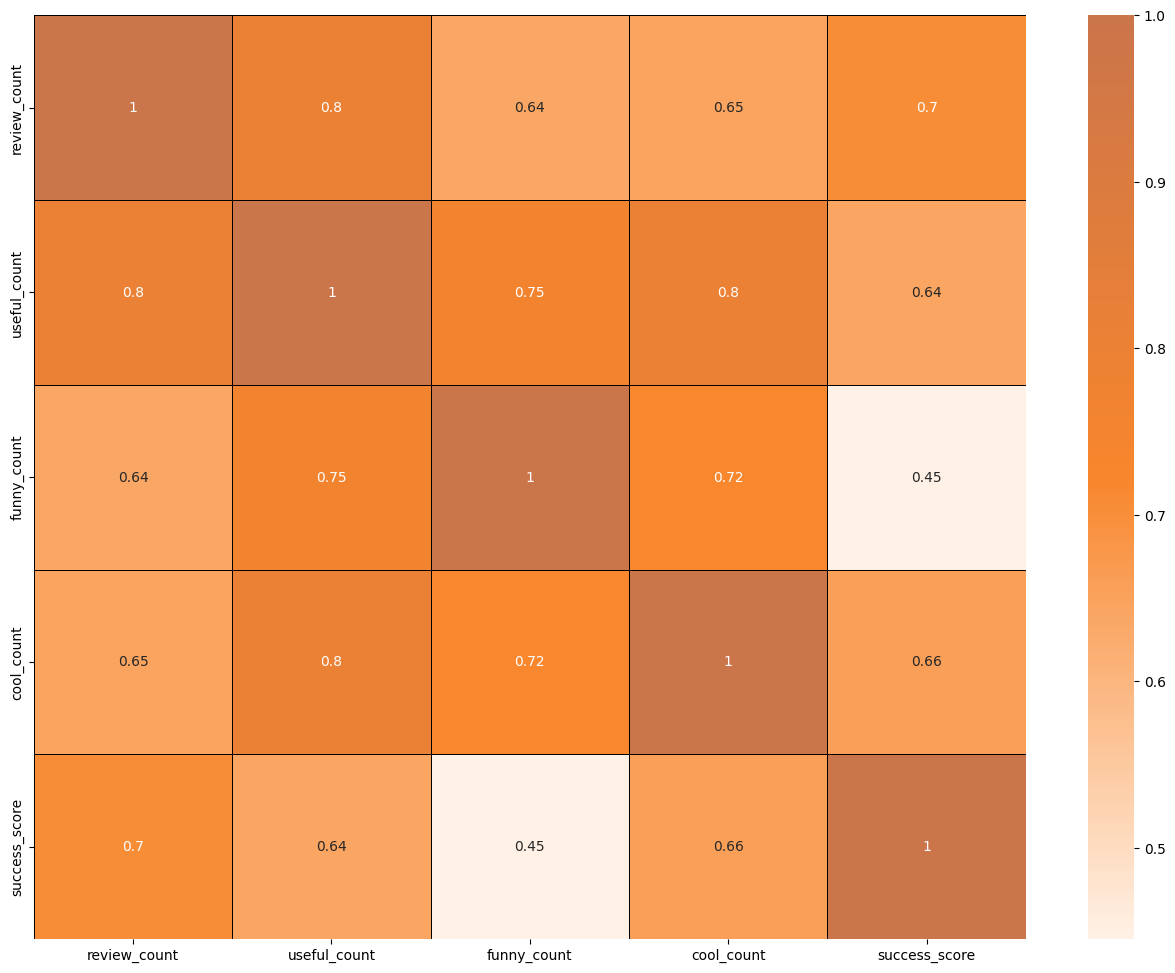

In [59]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.savefig('sentiment.png', transparent = True)
plt.show()

In [50]:
# Is there any difference in engagement of elite users and non elite users ?
elite_df = pd.read_sql_query("""SELECT
elite,
COUNT(*) AS num_user,
SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
           WHEN elite = '' THEN 'Not Elite'
           ELSE 'Elite'
           END AS elite,
           u.review_count
           FROM
               user u) AS user_elite
               GROUP BY 
                       elite;
""", db)

In [51]:
elite_df

,elite,num_user,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


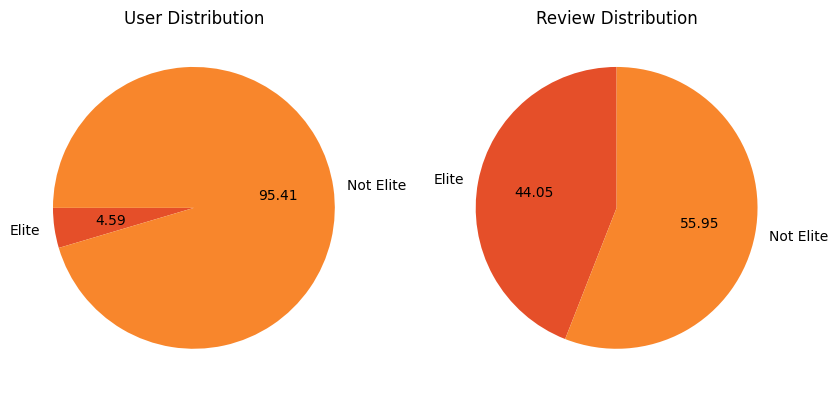

In [52]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_user'], labels = elite_df['elite'], autopct = '%.2f', startangle = 180, colors = ['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct = '%.2f', startangle = 90, colors = ['#E54F29', '#F8862C'])
plt.savefig('Class.png', transparent = True)
plt.show()

In [53]:
# what are the busiest hours for restaurants ?
review_engagement = pd.read_sql_query("""
SELECT cast (strftime ('%H', date) as integer)
as hour,
COUNT(*) AS review_count
FROM 
review
GROUP BY hour;
""", db)

tip_engagement = pd.read_sql_query("""
SELECT cast (strftime ('%H', date) as integer)
as hour,
COUNT(*) AS tip_count
FROM 
tip
GROUP BY hour;
""", db)

checkin = pd.read_sql_query("""SELECT date FROM checkin""", db)
checkin_management = []
for i in checkin['date']:
    checkin_management.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_management).astype('int').groupby(0)[[0]].count()

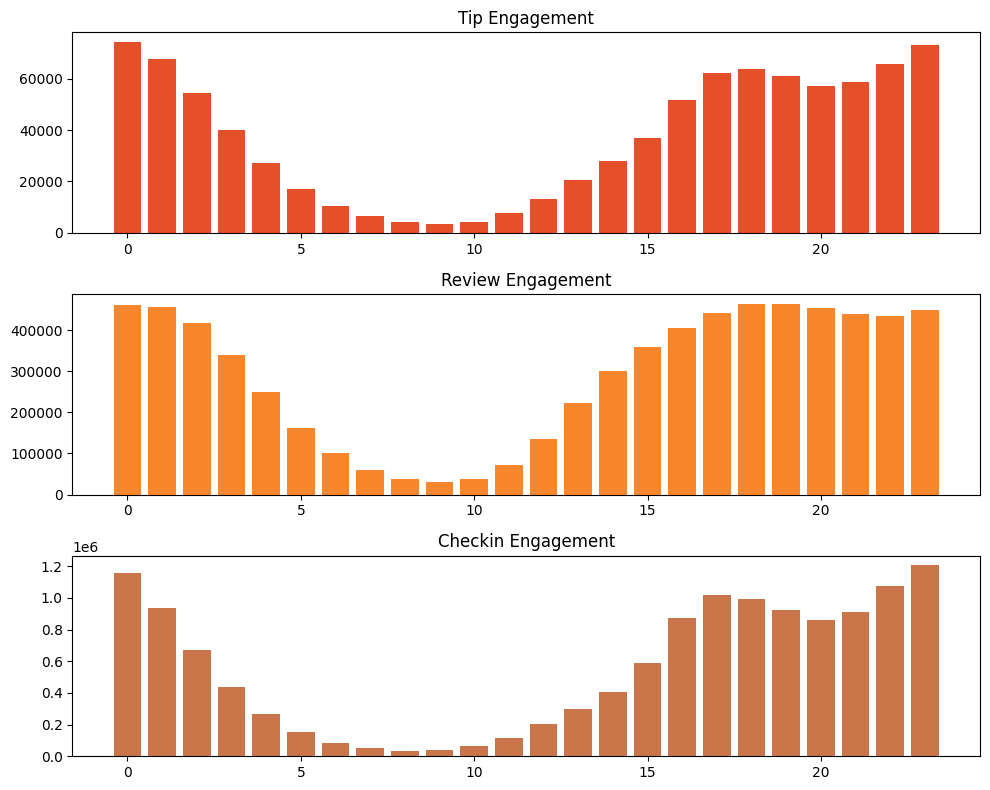

In [54]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')

plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')

plt.subplot(3, 1, 3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color='#CB754B')

plt.tight_layout()
plt.savefig('busiest_hours.png', transparent = True)
plt.show()
